# Project: Investigate FBI's NICS Background Check Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

We will be exploring the FBI NICS Firearm Background Check Data (can be found on <a id='https://github.com/BuzzFeedNews/nics-firearm-background-checks'>Github</a>).

This data set is provided by the FBI and includes counts of the usage of National Instant Criminal Background Check System (NICS). The figures in the data represent the number of firearm background checks via the NICS, and is an important distinction to note as it is not a direct representation of firearms sales. Data is provided for each US State, in addition to the District of Columbia along with US territories of the Virgin Islands, Guam, Mariana Islands and Puerto Rico, on a per month basis.

The data includes figures on permits along with transactions, further broken into type of transactions (pre-pawn, redemption, etc) and each of those transaction broken into type of firearms (hand gun, long gun, other).

The NICS dataset will further be supplemented with the 2016 U.S. Census data (can be downloaded <a id='https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a554c_u.s.-census-data/u.s.-census-data.csv&sa=D&ust=1532469042128000'>here</a>).

With this data we are going to explore the following questions - 

   1.) Are the number of NICS firearm transfer background checks trending upwards? And which states have the highest changing trends? Which firearm type is the most requested?
   
   2.) Do the 2016 census numbers show any differences in transfer background checks based of the following parameters? And are there any differences in type of firearm in the transfer.
        a) Median household income
        b) Educatation level of the populance
        c) Population density

For this we will be utilizing pandas for the data wrangling and matplotlib for the visualizations. We will be loading in and working with the following files.

'gun_data.xlsx' - this is an excel worksheet with the NICS data.

'U.S. Census Data 2016.csv' - this is a csv file with the 2016 Census data


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

First lets load in our datasets into pandas dataframes.

In [2]:
df_gun = pd.read_excel('gun_data.xlsx')
df_census = pd.read_csv('U.S. Census Data 2016.csv')

Lets focus on the NICS data. The NICS data contains 27 columns of data. The questions we are asking around this dataset is specific to background checks for transfers of firearms so lets drop columns which aren't related to those figures.

In [3]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

We are going to remove any column not related to a background check on a transfer to an individual. Right away we can remove the permit columns in addition to the total column, which will be recalculated once we drop the unnecessary columns.

In [4]:
df_gun.drop(labels=['permit', 'permit_recheck', 'totals'], axis=1, inplace=True)
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   handgun                    12465 non-null  float64
 3   long_gun                   12466 non-null  float64
 4   other                      5500 non-null   float64
 5   multiple                   12485 non-null  int64  
 6   admin                      12462 non-null  float64
 7   prepawn_handgun            10542 non-null  float64
 8   prepawn_long_gun           10540 non-null  float64
 9   prepawn_other              5115 non-null   float64
 10  redemption_handgun         10545 non-null  float64
 11  redemption_long_gun        10544 non-null  float64
 12  redemption_other           5115 non-null   float64
 13  returned_handgun           2200 non-null   flo

Now that those are out of the way what about the rest of the columns? After looking at the source pdf file for this data there are some additional columns we will remove. The admin column is for background checks related to only administrative reasons and not a transfer of a firearm. Additionally the columns related to redemption, returned, and return_to_seller I will remove as these represent firearms transferring back to an existing owner and to a new individual. Finally we will remove the rentals columns as they represent a loaned firearm and not a transfer.

In [5]:
drop_cols = ['admin', 'redemption_handgun', 'redemption_long_gun', 'redemption_other','returned_handgun', 
             'returned_long_gun', 'returned_other','rentals_handgun', 'rentals_long_gun', 'return_to_seller_handgun',
             'return_to_seller_long_gun', 'return_to_seller_other']

df_gun.drop(labels=drop_cols, axis=1, inplace=True)

df_gun.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  12485 non-null  object 
 1   state                  12485 non-null  object 
 2   handgun                12465 non-null  float64
 3   long_gun               12466 non-null  float64
 4   other                  5500 non-null   float64
 5   multiple               12485 non-null  int64  
 6   prepawn_handgun        10542 non-null  float64
 7   prepawn_long_gun       10540 non-null  float64
 8   prepawn_other          5115 non-null   float64
 9   private_sale_handgun   2750 non-null   float64
 10  private_sale_long_gun  2750 non-null   float64
 11  private_sale_other     2750 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1.1+ MB


To keep thing simple, and join with out census data, we will keep our analyst to only the 50 U.S. States so will remove all records that are not related to 1 of the 50.

In [6]:
df_gun['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

As mentioned in the introduction the NICS data has 4 U.S. territories and the District of Columbia which we can see above. We will use a mask to get the indexes for records containing those state values and drop them from the dataset.

In [7]:
drop_recs = ['District of Columbia','Guam','Mariana Islands', 'Puerto Rico','Virgin Islands']

mask = df_gun[df_gun['state'].isin(drop_recs)].index

df_gun.drop(mask, axis=0, inplace=True)

df_gun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350 entries, 0 to 12484
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  11350 non-null  object 
 1   state                  11350 non-null  object 
 2   handgun                11350 non-null  float64
 3   long_gun               11350 non-null  float64
 4   other                  5000 non-null   float64
 5   multiple               11350 non-null  int64  
 6   prepawn_handgun        9597 non-null   float64
 7   prepawn_long_gun       9595 non-null   float64
 8   prepawn_other          4650 non-null   float64
 9   private_sale_handgun   2500 non-null   float64
 10  private_sale_long_gun  2500 non-null   float64
 11  private_sale_other     2500 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1.1+ MB


Now that we have a good population to look at lets address these null values. Looking at the column names I would suspect that the null values are a result of the NICS not tracking the category of the background check in such a granular manner, ie in 1998 they might of just group all handguns in as one data point vs 2007 they break it out to include prepawn and private. To confirm this I want to look at the first and last records, as the dataset is already sorted by month, for those columns which have null values to see if there is a pattern.

In [8]:
null_cols = ['other', 'prepawn_handgun', 'prepawn_long_gun', 'prepawn_other', 'private_sale_handgun',
            'private_sale_long_gun', 'private_sale_other']

for col in null_cols:
    nulls = df_gun[df_gun[col].isnull()]['month']
    non_nulls = df_gun[~df_gun[col].isnull()]['month']
    print('Null date range for {} - {} to {} and total of {} records.'.format(col, nulls.tail(1).item(), 
                                                                              nulls.head(1).item(), nulls.shape[0]))
    
    print('Non-null date range for {} - {} to {} and total of {} records.\n'.format(col, non_nulls.tail(1).item(),
                                                                                    non_nulls.head(1).item(), non_nulls.shape[0]))

Null date range for other - 1998-11 to 2009-05 and total of 6350 records.
Non-null date range for other - 2009-06 to 2017-09 and total of 5000 records.

Null date range for prepawn_handgun - 1998-11 to 2005-07 and total of 1753 records.
Non-null date range for prepawn_handgun - 2001-10 to 2017-09 and total of 9597 records.

Null date range for prepawn_long_gun - 1998-11 to 2005-10 and total of 1755 records.
Non-null date range for prepawn_long_gun - 2001-10 to 2017-09 and total of 9595 records.

Null date range for prepawn_other - 1998-11 to 2009-12 and total of 6700 records.
Non-null date range for prepawn_other - 2010-01 to 2017-09 and total of 4650 records.

Null date range for private_sale_handgun - 1998-11 to 2013-07 and total of 8850 records.
Non-null date range for private_sale_handgun - 2013-08 to 2017-09 and total of 2500 records.

Null date range for private_sale_long_gun - 1998-11 to 2013-07 and total of 8850 records.
Non-null date range for private_sale_long_gun - 2013-08 t

As we can see with the exception of prepawn handgun and long gun the nulls all seem to correspond being to a prior month in the data set. Before we make any decision off this lets just take a look at the 2 columns that don't match this back looking further at their months. Lets compare the first 10 rows of the null values and the last 10 rows of the non-null values.

In [9]:
null_cols = ['prepawn_handgun', 'prepawn_long_gun']

for col in null_cols:
    nulls = df_gun[df_gun[col].isnull()]['month'].head(10)
    non_nulls = df_gun[~df_gun[col].isnull()]['month'].tail(10)
    print('Non-nulls {}\n{}\n'.format(col, non_nulls))
    print('Nulls {}\n{}\n\n'.format(col, nulls))
    

Non-nulls prepawn_handgun
10549    2001-10
10550    2001-10
10551    2001-10
10552    2001-10
10553    2001-10
10555    2001-10
10556    2001-10
10557    2001-10
10558    2001-10
10559    2001-10
Name: month, dtype: object

Nulls prepawn_handgun
8061     2005-07
8704     2004-07
10168    2002-05
10560    2001-09
10561    2001-09
10562    2001-09
10563    2001-09
10564    2001-09
10565    2001-09
10566    2001-09
Name: month, dtype: object


Non-nulls prepawn_long_gun
10549    2001-10
10550    2001-10
10551    2001-10
10552    2001-10
10553    2001-10
10555    2001-10
10556    2001-10
10557    2001-10
10558    2001-10
10559    2001-10
Name: month, dtype: object

Nulls prepawn_long_gun
7910     2005-10
7912     2005-10
8564     2004-10
10110    2002-06
10113    2002-06
10560    2001-09
10561    2001-09
10562    2001-09
10563    2001-09
10564    2001-09
Name: month, dtype: object




From this comparison we can see that in the prepawn categories there are 5 records in long gun and 3 records in handgun that fall out side a specific date. In other words for the prepawn handguns and long guns we can see that prior to October 2001 all values are null.

Based on all the columns with nulls following a pattern which seems to suggest not being tracked prior to a specific date, with few records falling out of this pattern in 2 of the columns, I am going to fill all null values with 0. This would be the most appropriate choice as filling them with any other value, like the mean, could cause figures being over reported over a large population of records.

In [10]:
df_gun.fillna(0, inplace=True)
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350 entries, 0 to 12484
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  11350 non-null  object 
 1   state                  11350 non-null  object 
 2   handgun                11350 non-null  float64
 3   long_gun               11350 non-null  float64
 4   other                  11350 non-null  float64
 5   multiple               11350 non-null  int64  
 6   prepawn_handgun        11350 non-null  float64
 7   prepawn_long_gun       11350 non-null  float64
 8   prepawn_other          11350 non-null  float64
 9   private_sale_handgun   11350 non-null  float64
 10  private_sale_long_gun  11350 non-null  float64
 11  private_sale_other     11350 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1.1+ MB


Now that we have our columns and nulls cleaned up on this dataset lets clean up the data types. Month is a month-year data point that is currently a string. As datetime data type offers many advantages in terms of built in functions lets convert month to datetime.

In [11]:
df_gun['month'] = pd.to_datetime(df_gun['month'])
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350 entries, 0 to 12484
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   month                  11350 non-null  datetime64[ns]
 1   state                  11350 non-null  object        
 2   handgun                11350 non-null  float64       
 3   long_gun               11350 non-null  float64       
 4   other                  11350 non-null  float64       
 5   multiple               11350 non-null  int64         
 6   prepawn_handgun        11350 non-null  float64       
 7   prepawn_long_gun       11350 non-null  float64       
 8   prepawn_other          11350 non-null  float64       
 9   private_sale_handgun   11350 non-null  float64       
 10  private_sale_long_gun  11350 non-null  float64       
 11  private_sale_other     11350 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(1), object(1)
memory

Finally lets get all of our counts into a consistent data type. Right now multiple is an int data type vs the rest of the counts which are floats.

In [12]:
df_gun['multiple'] = df_gun['multiple'].astype(float)
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350 entries, 0 to 12484
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   month                  11350 non-null  datetime64[ns]
 1   state                  11350 non-null  object        
 2   handgun                11350 non-null  float64       
 3   long_gun               11350 non-null  float64       
 4   other                  11350 non-null  float64       
 5   multiple               11350 non-null  float64       
 6   prepawn_handgun        11350 non-null  float64       
 7   prepawn_long_gun       11350 non-null  float64       
 8   prepawn_other          11350 non-null  float64       
 9   private_sale_handgun   11350 non-null  float64       
 10  private_sale_long_gun  11350 non-null  float64       
 11  private_sale_other     11350 non-null  float64       
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 1

Finally lets add a total column to sum on each row to get a total of all transfer background checks.

In [13]:
col_list = list(df_gun)
col_list.remove('month')
col_list.remove('state')

df_gun['total'] = df_gun[col_list].sum(axis=1)

df_gun.head()

,month,state,handgun,long_gun,other,multiple,prepawn_handgun,prepawn_long_gun,prepawn_other,private_sale_handgun,private_sale_long_gun,private_sale_other,total
0,2017-09-01,Alabama,5734.0,6320.0,221.0,317.0,15.0,21.0,2.0,9.0,16.0,3.0,12658.0
1,2017-09-01,Alaska,2320.0,2930.0,219.0,160.0,5.0,2.0,0.0,17.0,24.0,1.0,5678.0
2,2017-09-01,Arizona,11063.0,7946.0,920.0,631.0,13.0,6.0,0.0,38.0,12.0,2.0,20631.0
3,2017-09-01,Arkansas,4347.0,6063.0,165.0,366.0,12.0,13.0,0.0,13.0,23.0,0.0,11002.0
4,2017-09-01,California,37165.0,24581.0,2984.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64730.0


So now our NICS data has been cleaned. Let take a look at the 2016 U.S. Census data.

In [14]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

So the first thing to note is that there are 85 records where each record is a fact and each column is a state. We are only worried about 3 data points that we are going to be investigating, a) Median household income b) Educatation level of the populance c) Population density.

The three specific Fact labels are 'Median household income (in 2015 dollars), 2011-2015', 'Population per square mile, 2010' and 'Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015'. Additinoally we will include the population estimate to control for population per square mile. All other records can be removed in addition we will drop the 'Fact Note' column.

In [15]:
rows_to_drop = df_census[~df_census['Fact'].isin(['Median household income (in 2015 dollars), 2011-2015',
                                             'Population per square mile, 2010',
                                            "Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015", "Population estimates, July 1, 2016,  (V2016)"])].index

df_census.drop(labels=rows_to_drop, axis=0, inplace=True)
df_census.drop(labels=['Fact Note'], axis=1, inplace=True)

In [16]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 62
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            4 non-null      object
 1   Alabama         4 non-null      object
 2   Alaska          4 non-null      object
 3   Arizona         4 non-null      object
 4   Arkansas        4 non-null      object
 5   California      4 non-null      object
 6   Colorado        4 non-null      object
 7   Connecticut     4 non-null      object
 8   Delaware        4 non-null      object
 9   Florida         4 non-null      object
 10  Georgia         4 non-null      object
 11  Hawaii          4 non-null      object
 12  Idaho           4 non-null      object
 13  Illinois        4 non-null      object
 14  Indiana         4 non-null      object
 15  Iowa            4 non-null      object
 16  Kansas          4 non-null      object
 17  Kentucky        4 non-null      object
 18  Louisiana    

Now to get this into a similar structure as the NICS data we will transpose the dataframe. And once transposed we will rename the Facts to something more workable.

In [17]:
df_census.set_index('Fact', inplace=True)

df_census = df_census.T

In [18]:
df_census.rename(columns={"Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015": 
                              'bachelor_degree_percent', 
                          'Median household income (in 2015 dollars), 2011-2015': 'median_income',
                          'Population per square mile, 2010': 'population_per_mile',
                          "Population estimates, July 1, 2016,  (V2016)": 'population_est'},
                inplace=True)
df_census.index.names=['state']
df_census.columns.names=['']
df_census.head()

,population_est,bachelor_degree_percent,median_income,population_per_mile
state,,,,
Alabama,"4,863,300",23.50%,"$43,623",94.4
Alaska,"741,894",28.00%,"$72,515",1.2
Arizona,"6,931,071",27.50%,"$50,255",56.3
Arkansas,"2,988,248",21.10%,"$41,371",56
California,"39,250,017",31.40%,"$61,818",239.1


Now lets clean up the data types. All three columns are currently represented as strings but we will update them all to be floats.

In [19]:
df_census['population_est'] =df_census['population_est'].apply(lambda x: x.replace(',', '').strip()).astype(float)

In [20]:
df_census['bachelor_degree_percent'] = df_census['bachelor_degree_percent'].apply(lambda x: x.replace('%', '').strip() if '%' in x else float(x) * 100).astype(float)

In [21]:
df_census['median_income'] = df_census['median_income'].apply(lambda x: x.replace('$','').replace(',', '').strip()).astype(float)

In [22]:
df_census['population_per_mile'] = df_census['population_per_mile'].apply(lambda x: x.replace(',', '').strip()).astype(float)

df_census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   population_est           50 non-null     float64
 1   bachelor_degree_percent  50 non-null     float64
 2   median_income            50 non-null     float64
 3   population_per_mile      50 non-null     float64
dtypes: float64(4)
memory usage: 2.0+ KB


And finally to polish off our dataset lets add the 2016 NICS year totals for each state.

In [23]:
total_2016 = df_gun[df_gun['month'].dt.year == 2016].groupby(['state']).sum()

df_combined = df_census.join(total_2016, on='state')

In [24]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   population_est           50 non-null     float64
 1   bachelor_degree_percent  50 non-null     float64
 2   median_income            50 non-null     float64
 3   population_per_mile      50 non-null     float64
 4   handgun                  50 non-null     float64
 5   long_gun                 50 non-null     float64
 6   other                    50 non-null     float64
 7   multiple                 50 non-null     float64
 8   prepawn_handgun          50 non-null     float64
 9   prepawn_long_gun         50 non-null     float64
 10  prepawn_other            50 non-null     float64
 11  private_sale_handgun     50 non-null     float64
 12  private_sale_long_gun    50 non-null     float64
 13  private_sale_other       50 non-null     float64
 14  total                 

<a id='eda'></a>
## Exploratory Data Analysis

Now that we have our clean data sets lets start investigating our questions.

### Are the number of NICS firearm transfer background checks trending upwards? And which states have the highest changing trends? Which firearm type is the most requested?

So to look at whether firearm transfers are trending upwards lets look at the totals across each year in our data set. Lets also do it by both year and state to see which states have the highest upward trends.

In [25]:
df_yearly_totals = df_gun.groupby(df_gun['month'].dt.year).sum()

df_state_totals = df_gun.groupby(['state', df_gun['month'].dt.year]).sum()

Now lets calculate the 5 year moving average. To do this we will utilize the built in pandas rolling function and mean. To get the state and year we will have to do another group by then drop the new index and join the calculated values to the state totals dataframe.

In [26]:
df_yearly_totals['avg_total'] = df_yearly_totals['total'].rolling(5).mean()

state_means = df_state_totals.groupby(level=0)['total'].rolling(5).mean()

state_means.reset_index(level=0,drop=True, inplace=True)

df_state_totals = df_state_totals.join(state_means, on=['state', 'month'], rsuffix='_avg')
df_state_totals.reset_index(inplace=True)

Now lets do a simple line graph to plot out the moving average for each year and see what the trend looks like over time. Since we are using a 5 year average we will exclude the first 4 years as we don't have average information for them.

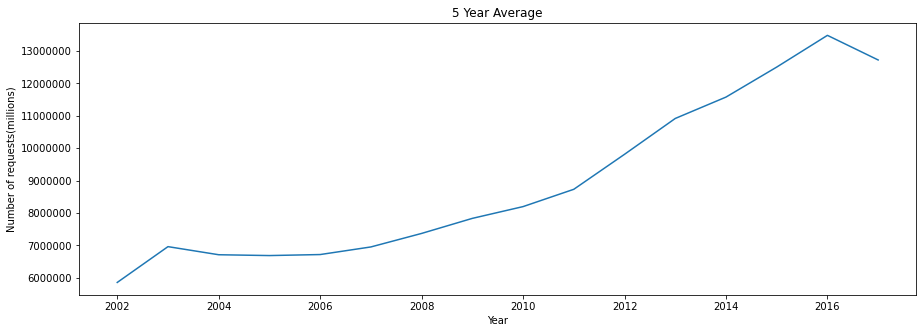

In [27]:
plt.figure(figsize=(15,5))
plt.plot(df_yearly_totals.iloc[4:].index, df_yearly_totals['avg_total'].iloc[4:])
plt.xlabel('Year')
plt.ylabel('Number of requests(millions)')
plt.title('5 Year Average')
plt.ticklabel_format(style = 'plain')
plt.show();

From the above graph we can see that the background requests for transfers has been largely trending upward for the last 15 years. Interesting enough in 2017 there was a significant drop and is the only year over year drop at such a volume.

Now that we see an upward trend lets take a look at each individual state and see if all states follow the same trend or if there are any outliers.

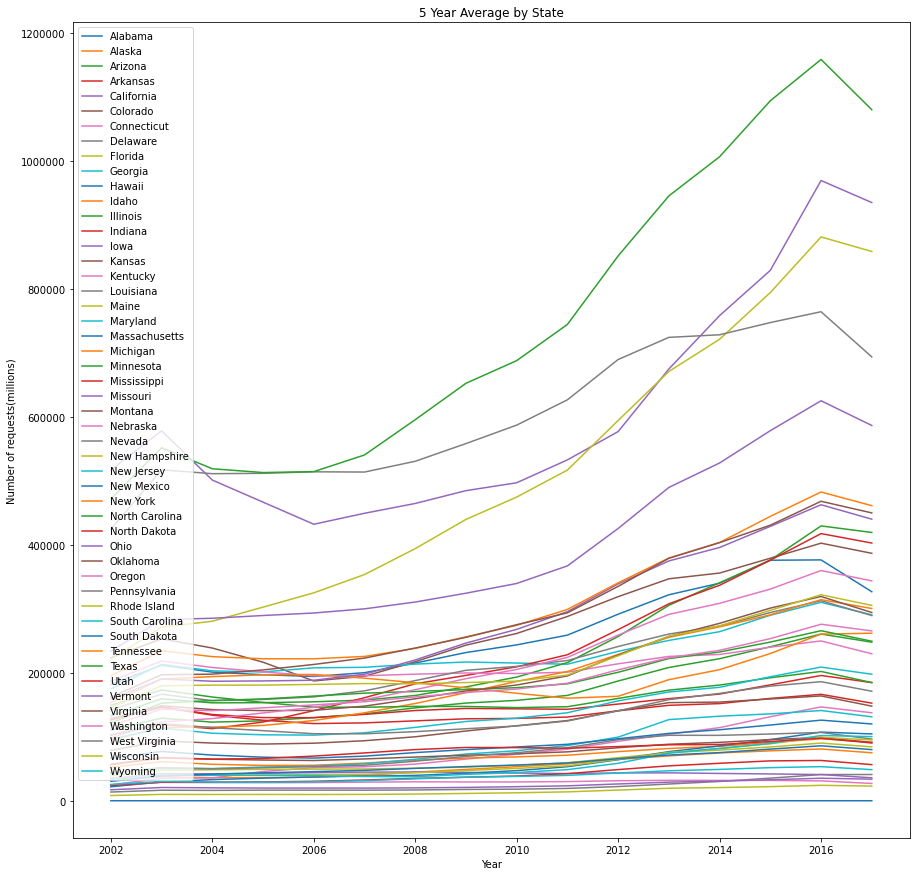

In [28]:
state_list = df_state_totals['state'].unique()
plt.figure(figsize=(15, 15))
for state in state_list:
    df = df_state_totals[df_state_totals['state'] == state].iloc[4:, :]
    plt.plot(df['month'], df['total_avg'], label=state)

plt.xlabel('Year')
plt.ylabel('Number of requests(millions)')
plt.title('5 Year Average by State')
plt.ticklabel_format(style = 'plain')
plt.legend()
plt.show();

This is a pretty busy graph and difficult to tell which state is which. One obvious thing is that there are 5 states above the rest of the pack for most of the last 15 years, so lets regraph this with only those five state. We will use 2016 as the reference point to get the top 5 states then regraph.

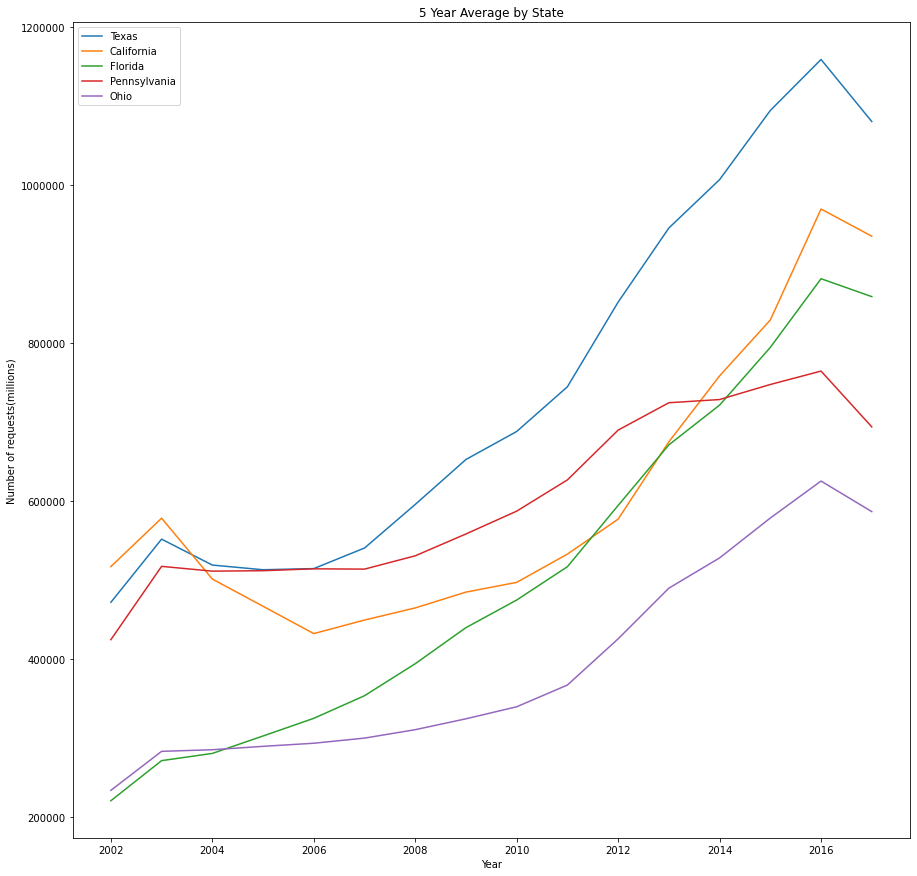

In [29]:
state_list = df_state_totals[df_state_totals['month'] == 2016].sort_values(by=['total_avg'], ascending=False).head()['state']

plt.figure(figsize=(15, 15))
for state in state_list:
    df = df_state_totals[df_state_totals['state'] == state].iloc[4:, :]
    plt.plot(df['month'], df['total_avg'], label=state)

plt.xlabel('Year')
plt.ylabel('Number of requests(millions)')
plt.title('5 Year Average by State')
plt.ticklabel_format(style = 'plain')
plt.legend()
plt.show();

From this we can see that the 5 top states are Texas, California, Florida, Pennsylvania, and Ohio.

Finally lets see which type of transfers are more frequent by looking at a graph on handgun to long gun.

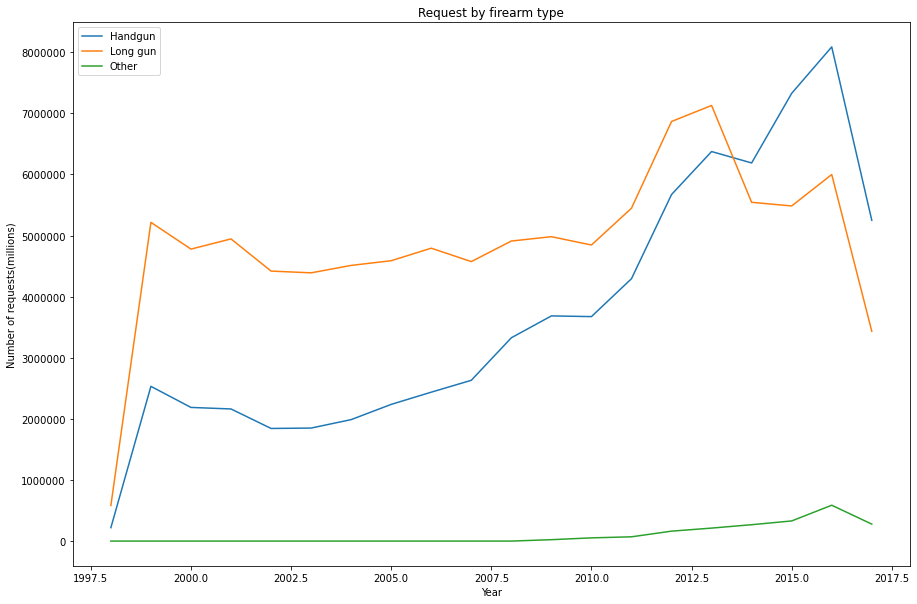

In [30]:
plt.figure(figsize=(15,10))
plt.plot(df_yearly_totals.index,
         df_yearly_totals['handgun'] + df_yearly_totals['prepawn_handgun'] + df_yearly_totals['private_sale_handgun'],
         label='Handgun')
plt.plot(df_yearly_totals.index,
         df_yearly_totals['long_gun'] + df_yearly_totals['prepawn_long_gun'] + df_yearly_totals['private_sale_long_gun'], 
         label='Long gun')
plt.plot(df_yearly_totals.index,
         df_yearly_totals['other'] + df_yearly_totals['prepawn_other'] + df_yearly_totals['private_sale_other'], 
         label='Other')
plt.xlabel('Year')
plt.ylabel('Number of requests(millions)')
plt.title('Request by firearm type')
plt.ticklabel_format(style = 'plain')
plt.legend()
plt.show();

### Do the 2016 census numbers show any differences in transfer background checks based of the following parameters? And are there any differences in type of firearm in the transfer. a) Median household income b) Educatation level of the populance c) Population density

Lets take a look at our 3 census data points as they relate to background requests. First lets take a look at the summary statistics for our 3 census data points. From there we can create bins to further see how groups in each bin differ.

In [31]:
df_combined[['bachelor_degree_percent', 'median_income', 'population_per_mile']].describe()

,bachelor_degree_percent,median_income,population_per_mile
count,50.00000,50.000000,50.000000
mean,29.01200,54311.860000,194.962000
std,4.93404,8949.529115,261.091465
min,19.20000,39665.000000,1.200000
25%,25.95000,47526.000000,44.450000
50%,28.20000,52601.000000,98.750000
75%,31.77500,60599.000000,209.500000
max,40.50000,74551.000000,1195.500000


In [32]:
df_combined['bin_degree'] = pd.cut(df_combined['bachelor_degree_percent'], [19, 25, 28, 31, 41],
                                   labels=['19-25%', '25-28%', '28-31%', '31-41%'])

df_combined['bin_income'] = pd.cut(df_combined['median_income'], [39000, 48000, 52000, 61000, 75000],
                                   labels=['39-48k', '48-52k', '52-61k', '60-75k'])

df_combined['bin_population_den'] = pd.cut(df_combined['population_per_mile'], [1, 45, 99, 210, 1200],
                                   labels=['1-45', '45-99', '99-210', '210-1200'])

bin_degree
19-25%    291543.1
25-28%    345059.2
28-31%    211065.2
31-41%    315260.4
Name: total, dtype: float64

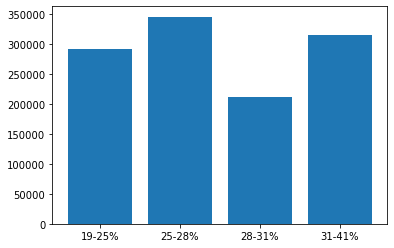

In [33]:
degree_mean = df_combined.groupby('bin_degree')['total'].mean()
plt.bar(degree_mean.index, degree_mean);
degree_mean

bin_income
39-48k    296218.357143
48-52k    323405.200000
52-61k    284081.733333
60-75k    298958.363636
Name: total, dtype: float64

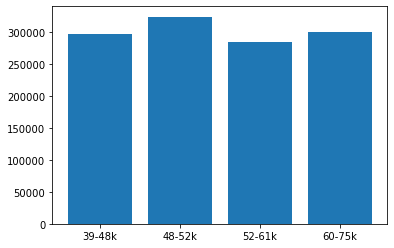

In [34]:
income_mean = df_combined.groupby('bin_income')['total'].mean()
plt.bar(income_mean.index, income_mean);
income_mean

When looking at the population density we want to control for the estimated population of the state. This is because the goal with this parameter is to look at whether states that are more spread out in terms of population show different means in number of requests. To do this lets just look at the total number of requests divided by the estimated population in our dataframe.

bin_population_den
1-45        0.069037
45-99       0.062604
99-210      0.056729
210-1200    0.034280
Name: total_pop_control, dtype: float64

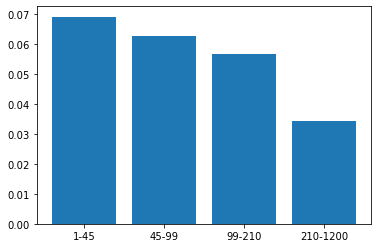

In [35]:
df_combined['total_pop_control'] = df_combined['total']/df_combined['population_est']
pop_mean = df_combined.groupby('bin_population_den')['total_pop_control'].mean()
plt.bar(pop_mean.index, pop_mean);
pop_mean

Lets compare these same parameters but looking at the firearm type.

,handgun_combined,longgun_combined,other_combined
bin_degree,,,
19-25%,158836.600000,118387.800000,7158.600000
25-28%,190515.533333,134982.466667,11825.133333
28-31%,122828.700000,83281.500000,2873.700000
31-41%,160888.333333,130499.266667,20611.933333


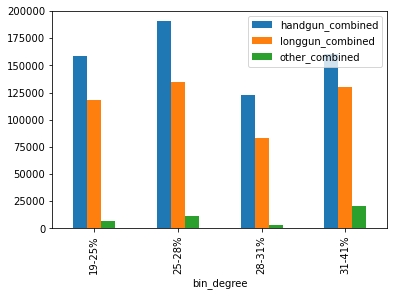

In [36]:
df_combined['handgun_combined'] = df_combined['handgun'] + df_combined['prepawn_handgun'] + df_combined['private_sale_handgun']
df_combined['longgun_combined'] = df_combined['long_gun'] + df_combined['prepawn_long_gun'] + df_combined['private_sale_long_gun']
df_combined['other_combined'] = df_combined['other'] + df_combined['prepawn_other'] + df_combined['private_sale_other']

degree_mean = df_combined.groupby('bin_degree')[['handgun_combined','longgun_combined','other_combined']].mean()
degree_mean.plot.bar()
degree_mean

,handgun_combined,longgun_combined,other_combined
bin_income,,,
39-48k,157835.571429,122703.928571,8532.000000
48-52k,180573.600000,126877.200000,9481.000000
52-61k,162227.666667,110573.733333,6325.933333
60-75k,148987.454545,123062.363636,25248.363636


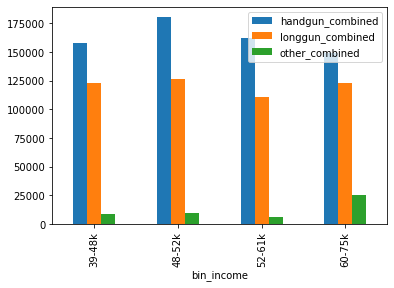

In [37]:
income_mean = df_combined.groupby('bin_income')[['handgun_combined','longgun_combined','other_combined']].mean()
income_mean.plot.bar()
income_mean

Again for population density we need to control our calculated figures by the estimated population of each state.

,handgun_pop_control,longgun_pop_control,other_pop_control
bin_population_den,,,
1-45,0.030944,0.034685,0.001874
45-99,0.031806,0.027326,0.001844
99-210,0.030954,0.023408,0.001546
210-1200,0.020635,0.011966,0.001132


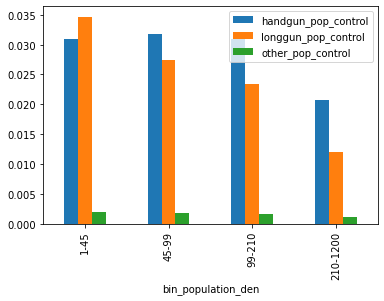

In [38]:
df_combined['handgun_pop_control'] = df_combined['handgun_combined']/df_combined['population_est']
df_combined['longgun_pop_control'] = df_combined['longgun_combined']/df_combined['population_est']
df_combined['other_pop_control'] = df_combined['other_combined']/df_combined['population_est']

pop_den_mean = df_combined.groupby('bin_population_den')[['handgun_pop_control','longgun_pop_control','other_pop_control']].mean()
pop_den_mean.plot.bar()
pop_den_mean

<a id='conclusions'></a>
## Conclusions

From our analysis we can see a few trends in the data. In terms of transfer background requests there is an upward trend in the number of requests each year. Although the 2017 data took a dip whether that further years continue that trend would have to be analyzed with newer year's data. The 5 states with the most background requests are Texas, California, Pennsylvania, Florida and Ohio. In terms of firearm types for background requests in the last decade handguns became the highest firearm for requests although prior to this it was long guns accounting for most requests.

When looking at the 2016 census metrics with the 2016 NICS figures we can see a few details. States where the percent of the population have a Bachelor Degree between 25-28% have the highest mean of total firearm transfer background requests. The state income bracket with the highest mean is 48-52k. When controlling for total population state with less population density correspond with higher mean of background requests.

Observing the 2016 census metrics to firearm types we see for both education level and income handguns show the highest mean for background requests. However population density differs in this as the lowest population density states show to have a higher long gun mean than firearm mean, where as all other bins of population density show the same trend of handgun mean being larger than long gun.

Ultimately it is again important to note than none of this can be applied to actual sales of firearms by states. This data just represent the request of a background check via the NICS and does not mean a sale or transfer actually took place.